In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

org_path = '/Users/nidhi/Desktop/ml/signatures/full_org'
forg_path = '/Users/nidhi/Desktop/ml/signatures/full_forg'
img_size = (220, 155)

def load_images(path, label):
    images = []
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, img_size)
            img = img / 255.0
            images.append((img, label))
    return images

genuine_data = load_images(org_path, 1)
forged_data = load_images(forg_path, 0)

data = genuine_data + forged_data
np.random.shuffle(data)

X, y = zip(*data)
X = np.array(X).reshape(-1, 220, 155, 1)
y = np.array(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    horizontal_flip=False,  # Keep false unless it helps
    fill_mode='nearest'
)

datagen.fit(X_train)

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

X_flat = X.reshape(len(X), -1)
X_train_flat, X_test_flat, y_train_svm, y_test_svm = train_test_split(X_flat, y, test_size=0.2, random_state=42)

svm = SVC(kernel='linear')
svm.fit(X_train_flat, y_train_svm)
pred_svm = svm.predict(X_test_flat)

print("SVM Classification Report:")
print(classification_report(y_test_svm, pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       271
           1       0.99      1.00      0.99       257

    accuracy                           0.99       528
   macro avg       0.99      0.99      0.99       528
weighted avg       0.99      0.99      0.99       528



In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_flat, y_train_svm)
pred_knn = knn.predict(X_test_flat)

print("KNN Classification Report:")
print(classification_report(y_test_svm, pred_knn))

KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.70      0.83       271
           1       0.76      1.00      0.87       257

    accuracy                           0.85       528
   macro avg       0.88      0.85      0.85       528
weighted avg       0.88      0.85      0.85       528



/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


66/66 ━━━━━━━━━━━━━━━━━━━━ 55s 810ms/step - accuracy: 0.9505 - loss: 1.2217 - val_accuracy: 0.5133 - val_loss: 29.2836
Epoch 2/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 52s 781ms/step - accuracy: 0.9974 - loss: 0.0526 - val_accuracy: 0.4867 - val_loss: 25.3664
Epoch 3/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 56s 850ms/step - accuracy: 0.9912 - loss: 0.3026 - val_accuracy: 0.4867 - val_loss: 109.5292
Epoch 4/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 50s 760ms/step - accuracy: 0.9972 - loss: 0.2023 - val_accuracy: 0.9564 - val_loss: 0.1547
Epoch 5/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 48s 729ms/step - accuracy: 0.9960 - loss: 0.0748 - val_accuracy: 0.9943 - val_loss: 0.0167
Epoch 6/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 48s 722ms/step - accuracy: 0.9977 - loss: 0.0198 - val_accuracy: 0.4867 - val_loss: 44.5410
Epoch 7/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 48s 727ms/step - accuracy: 0.9967 - loss: 0.1278 - val_accuracy: 0.5833 - val_loss: 20.1496
Epoch 8/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 54s 817ms/step - accuracy: 0.9980 - loss: 0.0278 - val_accuracy:

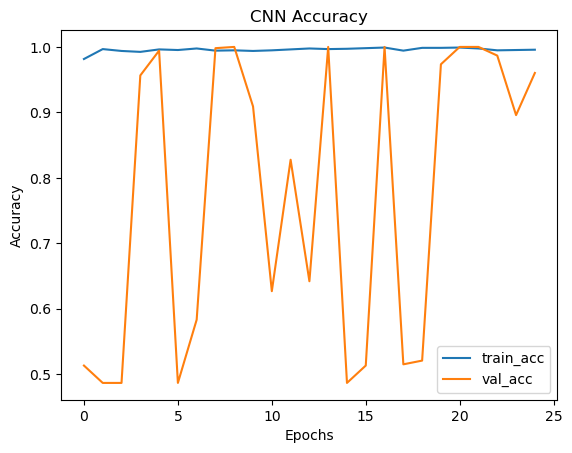

Epoch 1/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 691ms/step - accuracy: 0.9986 - loss: 0.0037

66/66 ━━━━━━━━━━━━━━━━━━━━ 48s 725ms/step - accuracy: 0.9985 - loss: 0.0037 - val_accuracy: 0.9716 - val_loss: 0.0597
Epoch 2/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 49s 744ms/step - accuracy: 0.9928 - loss: 0.0211 - val_accuracy: 0.7652 - val_loss: 5.2937
Epoch 3/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 718ms/step - accuracy: 0.9967 - loss: 0.0049

66/66 ━━━━━━━━━━━━━━━━━━━━ 50s 758ms/step - accuracy: 0.9967 - loss: 0.0049 - val_accuracy: 1.0000 - val_loss: 2.6533e-06
Epoch 4/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 50s 753ms/step - accuracy: 0.9995 - loss: 0.0021 - val_accuracy: 0.4867 - val_loss: 247.7214
Epoch 5/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 52s 785ms/step - accuracy: 0.9971 - loss: 0.0027 - val_accuracy: 0.4867 - val_loss: 232.5790
Epoch 6/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 52s 789ms/step - accuracy: 0.9972 - loss: 0.0098 - val_accuracy: 0.5871 - val_loss: 281.0681
Epoch 7/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 51s 767ms/step - accuracy: 0.9985 - loss: 0.0047 - val_accuracy: 0.8636 - val_loss: 22.4496
Epoch 8/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 53s 804ms/step - accuracy: 0.9969 - loss: 0.0118 - val_accuracy: 0.8428 - val_loss: 48.0588
Epoch 9/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 50s 752ms/step - accuracy: 0.9955 - loss: 0.0128 - val_accuracy: 0.9792 - val_loss: 0.3188
Epoch 10/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 50s 754ms/step - accuracy: 0.9994 - loss: 0.0162 - val_ac

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

def build_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(220, 155, 1)),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

cnn = build_cnn()
history = cnn.fit(datagen.flow(X_train, y_train, batch_size=32), 
                  epochs=25, 
                  validation_data=(X_test, y_test))

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("best_cnn_model.h5", monitor='val_accuracy', save_best_only=True)
cnn.fit(datagen.flow(X_train, y_train, batch_size=32),
        validation_data=(X_test, y_test),
        epochs=25,
        callbacks=[checkpoint])

def load_images(path, label):
    images = []
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.equalizeHist(img)
            img = cv2.resize(img, img_size)
            img = img / 255.0
            images.append((img, label))
    return images

In [22]:
loss, accuracy = cnn.evaluate(X_test, y_test, verbose=0)
print(f"Aggregate Test Accuracy: {accuracy * 100:.2f}%")

Aggregate Test Accuracy: 81.63%


In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get predictions
y_pred_probs = cnn.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Print classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       271
           1       1.00      0.62      0.77       257

    accuracy                           0.82       528
   macro avg       0.87      0.81      0.81       528
weighted avg       0.86      0.82      0.81       528

Confusion Matrix:
[[271   0]
 [ 97 160]]


In [ ]:
# doing the siamese network integration 

In [26]:
import os
import cv2
import random
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [28]:
img_size = (220, 155)

def load_images_from_folder(folder, label):
    images = []
    names = []
    for filename in os.listdir(folder):
        path = os.path.join(folder, filename)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, img_size)
            img = img / 255.0
            images.append(img)
            names.append(filename.split('_')[0])  # person ID
    return np.array(images), np.array(names)

In [30]:
def make_pairs(images, labels):
    pair_images = []
    pair_labels = []
    label_to_indices = {}

    for i, label in enumerate(labels):
        label_to_indices.setdefault(label, []).append(i)

    for idx1 in range(len(images)):
        img1 = images[idx1]
        label1 = labels[idx1]

        # Positive pair
        idx2 = random.choice(label_to_indices[label1])
        img2 = images[idx2]
        pair_images.append([img1, img2])
        pair_labels.append(1)

        # Negative pair
        label2 = random.choice([l for l in label_to_indices if l != label1])
        idx2 = random.choice(label_to_indices[label2])
        img2 = images[idx2]
        pair_images.append([img1, img2])
        pair_labels.append(0)

    return np.array(pair_images), np.array(pair_labels)

In [32]:
def build_base_network(input_shape):
    input = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu')(input)
    x = MaxPooling2D()(x)
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D()(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    return Model(input, x)

In [34]:
def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))
    # return K.abs(x - y)

input_shape = (220, 155, 1)
left_input = Input(shape=input_shape)
right_input = Input(shape=input_shape)

base_network = build_base_network(input_shape)

encoded_l = base_network(left_input)
encoded_r = base_network(right_input)

merged_vector = Lambda(euclidean_distance)([encoded_l, encoded_r])
output = Dense(1, activation='sigmoid')(merged_vector)

siamese_model = Model(inputs=[left_input, right_input], outputs=output)
siamese_model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

In [36]:
# Load data
org_images, org_labels = load_images_from_folder('/Users/nidhi/Desktop/ml/signatures/full_org', label=1)
forg_images, forg_labels = load_images_from_folder('/Users/nidhi/Desktop/ml/signatures/full_forg', label=0)

all_images = np.concatenate([org_images, forg_images])
all_labels = np.concatenate([org_labels, forg_labels])

# Create pairs
pairs, pair_labels = make_pairs(all_images, all_labels)

# Reshape for CNN
pairs = pairs.reshape(-1, 2, 220, 155, 1)
pair_1 = pairs[:, 0]
pair_2 = pairs[:, 1]

# Train-test split
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(
    pair_1, pair_2, pair_labels, test_size=0.2, random_state=42
)

# Train
siamese_model.fit([X1_train, X2_train], y_train, validation_data=([X1_test, X2_test], y_test), epochs=20, batch_size=32)

Epoch 1/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 313s 2s/step - accuracy: 0.8142 - loss: 0.3484 - val_accuracy: 0.9527 - val_loss: 0.1222
Epoch 2/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 352s 3s/step - accuracy: 0.9666 - loss: 0.0911 - val_accuracy: 0.9470 - val_loss: 0.1361
Epoch 3/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 333s 3s/step - accuracy: 0.9900 - loss: 0.0334 - val_accuracy: 0.9744 - val_loss: 0.0696
Epoch 4/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step - accuracy: 0.9958 - loss: 0.0179 - val_accuracy: 0.9716 - val_loss: 0.0854
Epoch 5/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 306s 2s/step - accuracy: 0.9955 - loss: 0.0171 - val_accuracy: 0.9612 - val_loss: 0.1372
Epoch 6/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 290s 2s/step - accuracy: 0.9935 - loss: 0.0258 - val_accuracy: 0.9763 - val_loss: 0.0633
Epoch 7/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 270s 2s/step - accuracy: 0.9988 - loss: 0.0063 - val_accuracy: 0.9830 - val_loss: 0.0591
Epoch 8/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 335s 3s/step - accuracy: 1.0000 - loss: 7.1932e-04 - val_

In [38]:
loss, accuracy = siamese_model.evaluate([X1_test, X2_test], y_test)
print(f"Siamese Network Test Accuracy: {accuracy * 100:.2f}%")

33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 342ms/step - accuracy: 0.9845 - loss: 0.0594
Siamese Network Test Accuracy: 98.20%


In [101]:
import cv2
import numpy as np

def preprocess_signature(img_path, target_size=(155, 220)):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Binarize
    _, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

    # Find bounding box
    coords = cv2.findNonZero(img)
    x, y, w, h = cv2.boundingRect(coords)

    # Crop tightly around signature
    img_cropped = img[y:y+h, x:x+w]

    # Resize with aspect ratio
    h, w = img_cropped.shape
    scale = min(target_size[0] / h, target_size[1] / w)
    new_h, new_w = int(h * scale), int(w * scale)
    img_resized = cv2.resize(img_cropped, (new_w, new_h))

    # Padding
    pad_top = (target_size[0] - new_h) // 2
    pad_bottom = target_size[0] - new_h - pad_top
    pad_left = (target_size[1] - new_w) // 2
    pad_right = target_size[1] - new_w - pad_left

    img_padded = cv2.copyMakeBorder(img_resized, pad_top, pad_bottom, pad_left, pad_right, cv2.BORDER_CONSTANT, value=0)

    # Normalize
    img_normalized = img_padded / 255.0
    return img_normalized.reshape((target_size[0], target_size[1], 1))


from skimage.metrics import structural_similarity as ssim

def calculate_ssim(img1, img2):
        # Convert from float32 [0,1] back to pixel range [0,255] if needed
    score, _ = ssim(img1.squeeze(), img2.squeeze(), full=True, data_range=1.0)
    print(f"SSIM Score: {score:.4f}")
    # score, _ = ssim(img1.squeeze(), img2.squeeze(), full=True)
    return score

In [103]:
# def verify_signature(reference_path, test_path, model, threshold=0.5):
#     ref_img = preprocess_signature(reference_path)
#     test_img = preprocess_signature(test_path)
    
#     prediction = model.predict([ref_img, test_img])[0][0]
#     print(f"Similarity Score: {prediction:.4f}")
    
#     if prediction > threshold:
#         print("✅ Genuine Signature")
#     else:
#         print("❌ Forged Signature")

def is_genuine(img1, img2, model, threshold=0.5):
    ssim_score = calculate_ssim(img1, img2)
    
    # If SSIM is very high, treat as genuine without using model
    if ssim_score > 0.85:
        print("High SSIM similarity. Likely Genuine.")
        return "Genuine (based on SSIM)"
    
    # Otherwise, use Siamese network prediction
    prediction = model.predict([np.expand_dims(img1, axis=0), np.expand_dims(img2, axis=0)])
    print(f"Model Prediction Score: {prediction[0][0]:.4f}")
    
    if prediction[0][0] > threshold:
        return "Genuine"
    else:
        return "Forged"

In [119]:
img1 = '/Users/nidhi/Desktop/ml/signatures/org.jpeg'
img2 = '/Users/nidhi/Desktop/ml/signatures/forg.jpeg'


img11 = preprocess_signature(img1)
img22 = preprocess_signature(img2)

result = is_genuine(img11, img22, siamese_model)
print(result)

SSIM Score: 0.7076
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Model Prediction Score: 0.0003
Forged
